In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc
from tabulate import tabulate

In [2]:
def show_v(V:np.array):
    fig, ax = plt.subplots()
    im = ax.imshow(V)
    x,y = V.shape
    for i in range(x):
        for j in range(y):
            text = ax.text(i,j,f"{V[i][j]:.2f}", ha= "center",va="center", color="w")
    fig.tight_layout()
    plt.show()

In [3]:
def get_vij(i,j,dir_:str,V:np.array)->float:
    si, sj = V.shape
    di = 0
    dj = 0
    if dir_ == "up":
        dj = 1
    if dir_ == "down":
        dj = -1
    if dir_ == "left":
        di = -1
    if dir_ == "right":
        di = 1
    if i+di < 0 or j+dj < 0 or i+di>si-1 or j+dj > sj-1:
        return V[i][j]
    return V[i+di][j+dj]

def calculate_vij(i:int,j:int,V:np.array, r =-1, p = 1/4):
    si, sj = V.shape
    if (i == 0 and j == 0) or (i==si-1 and j == sj-1):
        return 0
    options = ["left", "right","up","down"]
    vij = 0
    for opt in options:
        vij += p*(r+get_vij(i,j,opt,V))
    return vij

def calculate_vp(V:np.array, r =-1, p = 1/4):
    si, sj = V.shape
    v_p = np.zeros_like(V)
    for i in range(si):
        for j in range(sj):
            v_p[i][j] = calculate_vij(i,j,V,r,p)
    return v_p

In [4]:
def get_direction(i,j,V:np.array):
    si, sj = V.shape
    if (i == 0 and j == 0) or (i==si-1 and j == sj-1):
        return " "
    options = ["left", "right","up","down"]
    a_val = [get_vij(i,j,op,V) for op in options]
    tolerance = 1e-4
    if np.all(np.isclose(a_val, a_val[0], atol=tolerance)):
        return "✥"
    
    if (a_val[0] == a_val[1] and a_val[0] == np.max(a_val)):
        return "↔"
    if (a_val[0] == a_val[3] and a_val[1] == a_val[2] and a_val[0] == np.max(a_val)) and a_val[1] == np.max(a_val):
        return "⤡"
    if (a_val[0] == a_val[2] and a_val[1] == a_val[3] and a_val[0] == np.max(a_val)) and a_val[1] == np.max(a_val):
        return "⤢"
    
    if (np.isclose(a_val[0], a_val[2], atol=tolerance) and np.isclose(a_val[0], np.max(a_val), atol=tolerance)):
        return "⭩"
    if (np.isclose(a_val[0], a_val[3], atol=tolerance) and np.isclose(a_val[0], np.max(a_val), atol=tolerance)):
        return "⭦"
    
    if (np.isclose(a_val[1], a_val[2], atol=tolerance) and np.isclose(a_val[1], np.max(a_val), atol=tolerance)):
        return "⭨"
    if (np.isclose(a_val[1], a_val[3], atol=tolerance) and np.isclose(a_val[1], np.max(a_val), atol=tolerance)):
        return "⭧"
    
    opts = ["⭠","⭢","⭣","⭡"]
    return opts[np.argmax(a_val)]
    
def show_directions(V:np.array):
    x, y = V.shape
    for i in range(x):
        row = []
        for j in range(y):    
            row.append(get_direction(j,i,V))
        print(" ".join(row))

In [5]:
V = np.zeros((4,4))

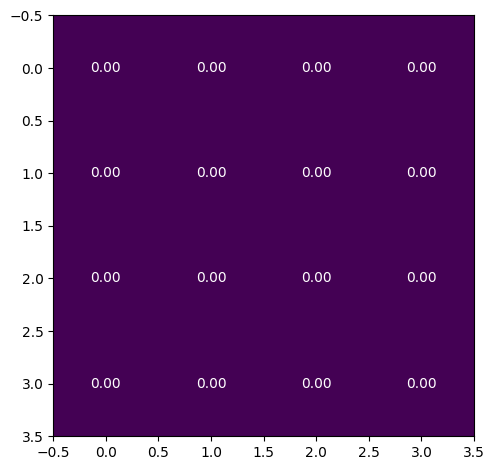

In [6]:
show_v(V)

In [7]:
show_directions(V)

  ✥ ✥ ✥
✥ ✥ ✥ ✥
✥ ✥ ✥ ✥
✥ ✥ ✥  


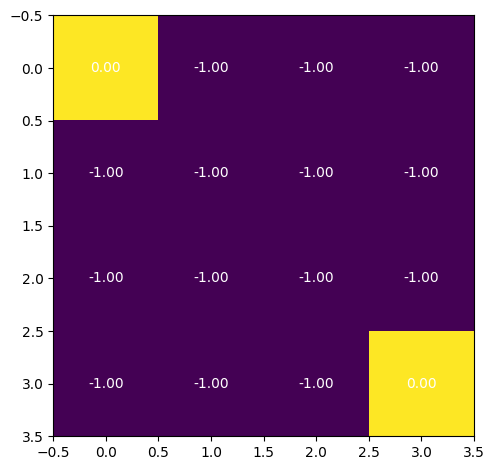

In [8]:
V_p = calculate_vp(V)
show_v(V_p)

In [9]:
show_directions(V_p)

  ⭠ ✥ ✥
⭡ ✥ ✥ ✥
✥ ✥ ✥ ⭣
✥ ✥ ⭢  


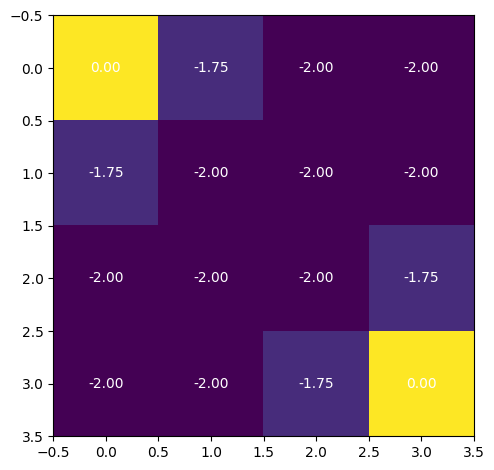

In [10]:
V_p2 = calculate_vp(V_p)
show_v(V_p2)

In [11]:
show_directions(V_p2)

  ⭠ ⭠ ✥
⭡ ⭦ ✥ ⭣
⭡ ✥ ⭨ ⭣
✥ ⭢ ⭢  


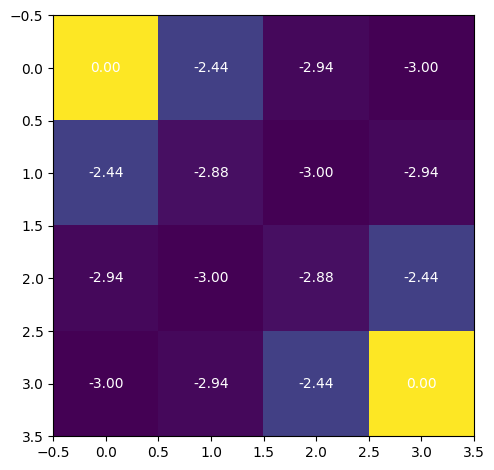

  ⭠ ⭠ ⭩
⭡ ⭦ ⭩ ⭣
⭡ ⭧ ⭨ ⭣
⭧ ⭢ ⭢  


In [12]:
vi = V
for i in range(3):
    vi = calculate_vp(vi)
show_v(vi)
show_directions(vi)

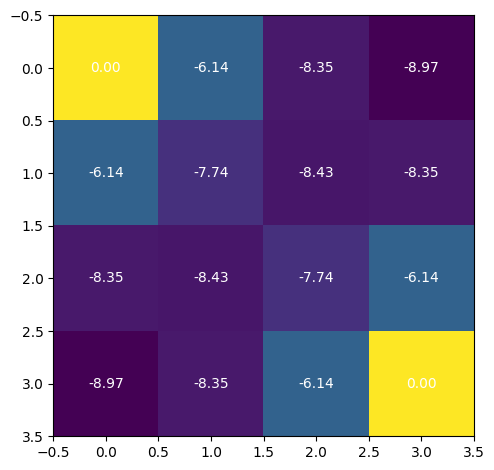

  ⭠ ⭠ ⭩
⭡ ⭦ ⭩ ⭣
⭡ ⭧ ⭨ ⭣
⭧ ⭢ ⭢  


In [13]:
vi = V
for i in range(10):
    vi = calculate_vp(vi)
show_v(vi)
show_directions(vi)

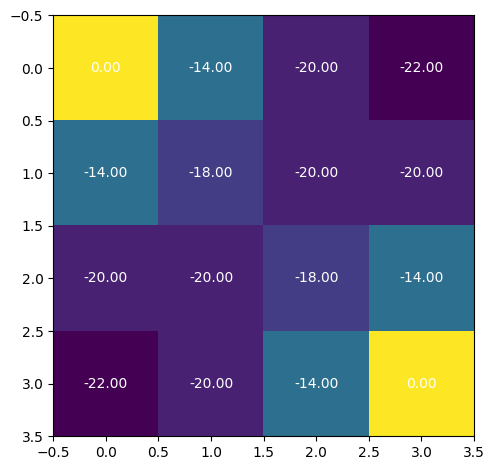

  ⭠ ⭠ ⭩
⭡ ⭦ ⭩ ⭣
⭡ ⭧ ⭨ ⭣
⭧ ⭢ ⭢  


In [14]:
vi = V
for i in range(200):
    vi = calculate_vp(vi)
show_v(vi)
show_directions(vi)

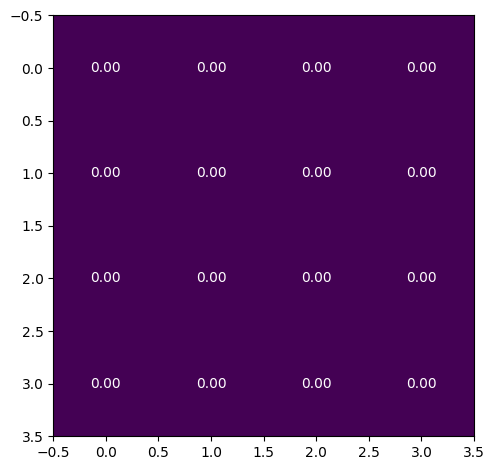

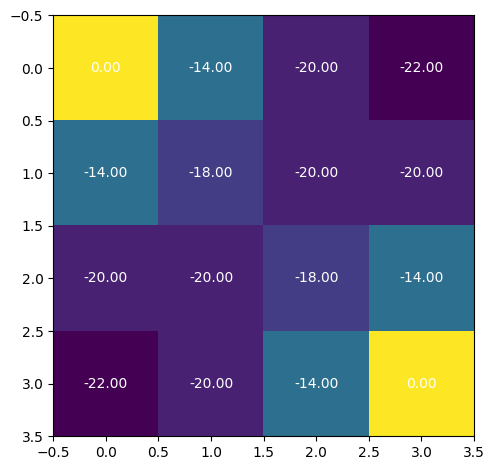

In [56]:
def iterative_policy_calculation(V:np.array,theta = 1e-5):
    
    while True:
        delta = 0
        V_p = calculate_vp(V)
        delta = max(0,np.max(np.abs(V-V_p)))
        V = V_p
        if delta < theta:
            break
    return V

show_v(V)
V_pi = iterative_policy_calculation(V)
show_v(V_pi)